In [3]:
import numpy as np
import cv2
import sys

In [ ]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    sys.exit("video open failed")
    
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
fps = round(cap.get(cv2.CAP_PROP_FPS * 0.75))
fourcc = cv2.VideoWriter_fourcc(*"DIVX")

out = cv2.VideoWriter("20211222out.avi", fourcc, fps, (w, h))

while 1:
    retval, frame = cap.read()
    
    if not retval:
        print("video read failed")
        break
        
    edge = cv2.Canny(frame, 50, 150) # 50 하한 / 150 상한
    
    out.write(frame)
    
    cv2.imshow(edge)
    cv2.imshow(frame)
    
    if cv2.waitKey(30) == 27:
        break
    
cap.release()
cv2.destroyAllWindows()

In [4]:
img = cv2.imread("./fig/puppy.bmp", 0)

if img is None:
    print("image read failed")
    sys.exit()
    
cv2.imshow("img", img)

while 1:
    key = cv2.waitKey()
    
    if key == 27:
        break
    elif key == ord("e"):
        img = cv2.Canny(img, 50, 150)
        cv2.imshow("img", img)
    elif key == ord("i"):
        img =~ img
        cv2.imshow("img", img)
        
cv2.destroyAllWindows()

In [5]:
oldx, oldy = -1, -1

def call_mouse(event, x, y, flags, param):
    global oldx, oldy
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags == cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (0, 0, 255), 5)
            cv2.imshow("image", img)
            oldx, oldy = x, y

img = np.ones((480, 640, 3), np.uint8) * 255

cv2.namedWindow("image")

cv2.setMouseCallback("image", call_mouse, img)
cv2.imshow("image", img)

cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
def call_trackbar(x):
    img2 = img + x
    cv2.imshow("image", img2)

img = np.zeros((480, 640), np.uint8)

cv2.namedWindow("image")
cv2.createTrackbar("level", "image", 0, 255, call_trackbar)

cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
img = cv2.imread("./fig/puppy.bmp")

b, g, r = cv2.split(img)
img_bgr = cv2.merge([b, g, r]) # numpy.ndarray

cv2.imshow("src", img)
# cv2.imshow("b", b)
# cv2.imshow("g", g)
# cv2.imshow("r", r)
cv2.imshow("img_bgr", img_bgr)

cv2.waitKey()
cv2.destroyAllWindows()

In [1]:
import matplotlib.pyplot as plt

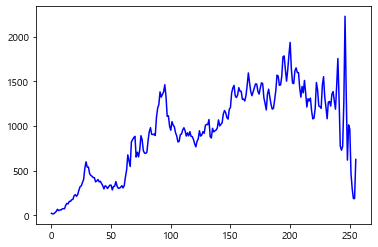

In [13]:
img = cv2.imread("./images/field.bmp", 0)

# hist = cv2.calcHist([img], [0], None, [256], [0, 256])
bgr_p = cv2.split(img)
colors = ["b", "g", "r"]

for (p, c) in zip(bgr_p, colors):
    hist = cv2.calcHist([p], [0], None, [256], [0, 256])
    plt.plot(hist, color = c)
    
# plt.plot(hist)
plt.show()

cv2.imshow("src", img)

cv2.waitKey()
cv2.destroyAllWindows()

In [40]:
src = cv2.imread("./images/field.bmp")
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

y, cr, cb = cv2.split(src_ycrcb)
# y = cv2.equalizeHist(y) # 명도 채널 수정
src_ycrcb = cv2.equalizeHist(src_ycrcb[:, :, 0])

# dst_ycrcb = cv2.merge([y, cr, cb])
dst = cv2.cvtColor(dst_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow("src", src)
# cv2.imshow("y", y)
# cv2.imshow("cr", cr)
# cv2.imshow("cb", cb)
cv2.imshow("dst", dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [48]:
src = cv2.imread("./fig_4/cropland.png")
x = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(x)

v = cv2.equalizeHist(v)

dst_hsv = cv2.merge([h, s, v])
dst_hsv = cv2.cvtColor(dst_hsv, cv2.COLOR_HSV2BGR)

cv2.imshow("v", dst_hsv)

cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
src = cv2.imread("./fig_4/candies.png")

# inRange(src, lowerb, upperb[, dst]) -> dst
# src: 입력영상
# lowerb: 하한값
# upperb: 상한값
dst_bgr = cv2.inRange(src, (0, 100, 0), (50, 255, 50)) 
# color의 range를 뽑아내는 것

dst_hsv = cv2.inRange(src_hsv, ())

cv2.imshow("src", src)
cv2.imshow("dst_bgr0", dst_bgr)

cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
src = cv2.imread("./fig_4/candies.png")

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

dst_hsv = cv2.inRange(src_hsv, (50, 170, 0), (70, 255, 255))

cv2.imshow("src", src)
cv2.imshow("dst_bgr0", dst_bgr)

cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt

In [24]:
src = cv2.imread("./fig_4/flowers.jpg")

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# dst_hsv = cv2.inRange(src_hsv, (150, 50, 0), (179, 255, 255))
dst_hr = cv2.inRange(src_hsv, (150, 150, 0), (179, 255, 255))
dst_hg = cv2.inRange(src_hsv, (30, 50, 0), (70, 255, 255))
dst_hb = cv2.inRange(src_hsv, (100, 150, 0), (120, 255, 255))

cv2.imshow("src", src)
# cv2.imshow("dst_bgr0", dst_hsv)
cv2.imshow("dst_hr", dst_hr)
cv2.imshow("dst_hg", dst_hg)
cv2.imshow("dst_hb", dst_hb)

cv2.waitKey()
cv2.destroyAllWindows()

In [25]:
def call_trackbar(x):
    hmin = cv2.getTrackbarPos("min", "dst")
    hmax = cv2.getTrackbarPos("max", "dst")
    
    dst = cv2.inRange(src_hsv, (hmin, 150, 0), (hmax, 255, 255))
    cv2.imshow("dst", dst)

src = cv2.imread("./fig_4/candies.png")

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

cv2.namedWindow("dst")
cv2.createTrackbar("min", "dst", 0, 179, call_trackbar)
cv2.createTrackbar("max", "dst", 100, 179, call_trackbar)

# dst_hsv = cv2.inRange(src_hsv, (150, 50, 0), (179, 255, 255))
# dst_hr = cv2.inRange(src_hsv, (150, 150, 0), (179, 255, 255))
# dst_hg = cv2.inRange(src_hsv, (30, 50, 0), (70, 255, 255))
# dst_hb = cv2.inRange(src_hsv, (100, 150, 0), (120, 255, 255))

# cv2.imshow("dst", src)
# cv2.imshow("dst_bgr0", dst_hsv)

cv2.waitKey()
cv2.destroyAllWindows()